# 卷积神经网络

## 项目：为小狗识别应用编写算法 

---

在此 notebook 中，我们已经为你提供一些模板代码，要成功完成此项目，你需要实现其他功能。除此之外，不需要修改所提供的代码。标题中以**（实现）**开头的部分表明你必须在下面的代码块中提供其他功能。我们会在每个部分提供说明，并在以“TODO”开头的代码块中提供实现细节。请仔细阅读说明。 

> **注意**：完成所有代码实现后，最后需要将 iPython Notebook 导出为 HTML 文档。在将 notebook 导出为 HTML 前，请运行所有代码单元格，使审阅者能够查看最终实现和输出结果。然后导出 notebook，方法是：使用顶部的菜单并依次转到**文件 -> 下载为 -> HTML (.html)**。提交内容应该同时包含此 notebook 和完成的文档。

除了实现代码之外，还需要回答与项目和代码实现相关的问题。请仔细阅读每个问题，并在**答案：**下方的文本框中填写答案。我们将根据每个问题的答案以及实现代码评估你提交的项目。

>**注意：**可以通过 **Shift + Enter** 键盘快捷键执行代码和标记单元格，并且可以通过双击单元格进入编辑模式，编辑标记单元格。

审阅标准还包含可选的“锦上添花”建议，可以指导你在满足最低要求的基础上改进项目。如果你打算采纳这些建议，则应该在此 Jupyter notebook 中添加代码。



---
### 为何要完成这道练习 

在此 notebook 中，你将开发一种可用于移动应用或网络应用的算法。最终你的代码将能够将任何用户提供的图像作为输入。如果从图像中检测出小狗，该算法将大致识别出小狗品种。如果检测出人脸，该算法将大致识别出最相似的小狗品种。下图显示了最终项目的潜在示例输出（但是我们希望每个学员的算法行为都不一样。）。 

![Sample Dog Output](images/sample_dog_output.png)

在此实际应用中，你需要将一系列模型整合到一起并执行不同的任务；例如，检测图中人脸的算法与推理小狗品种的 CNN 将不一样。有很多地方都可能会出错，没有什么完美的算法。即使你的答案不完美，也可以创造有趣的用户体验。

### 项目规划

我们将此 notebook 分成了几个独立的步骤。你可以通过以下链接浏览此 notebook。

* [第 0 步](#step0)：导入数据集
* [第 1 步](#step1)：检测人脸
* [第 2 步](#step2)：检测小狗
* [第 3 步](#step3)：（从头开始）创建分类小狗品种的 CNN
* [第 4 步](#step4)：（使用迁移学习）创建分类小狗品种的 CNN
* [第 5 步](#step5)：编写算法
* [第 6 步](#step6)：测试算法

---
<a id='step0'></a>
## 第 0 步：导入数据集

首先下载人脸和小狗数据集：
* 下载[小狗数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip)。解压文件并将其放入此项目的主目录中，位置为 `/dog_images`。 

* 下载[人脸数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip)。解压文件并将其放入此项目的主目录中，位置为 `/lfw`。  

*注意如果你使用的是 Windows 设备，建议使用 [7zip](http://www.7-zip.org/) 解压文件。*

在下面的代码单元格中将人脸 (LFW) 数据集和小狗数据集的文件路径保存到 NumPy 数组 `human_files` 和 `dog_files` 中。

In [95]:
import numpy as np
from glob import glob

import matplotlib.pyplot as plt                        
%matplotlib inline    

import torchvision.transforms as transforms

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## 第 1 步：检测人脸

在此部分，我们使用 OpenCV 的[哈儿特征级联分类器](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)检测图像中的人脸。  

OpenCV 提供了很多预训练的人脸检测器，它们以 XML 文件的形式存储在 [github](https://github.com/opencv/opencv/tree/master/data/haarcascades) 上。我们下载了其中一个检测器并存储在 `haarcascades` 目录中。在下个代码单元格中，我们将演示如何使用此检测器从样本图像中检测人脸。

Number of faces detected: 1


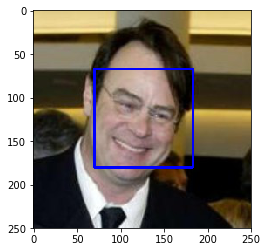

In [2]:
import cv2                
                           
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

在使用任何人脸检测器之前，标准做法是将图像转换为灰阶图像。`detectMultiScale` 函数会执行存储在 `face_cascade` 中的分类器并将灰阶图像当做参数。  

在上述代码中，`faces` 是一个包含检测到的人脸的 numpy 数组，其中每行对应一张检测到的人脸。检测到的每张人脸都是一个一维数组，其中有四个条目，分别指定了检测到的人脸的边界框。数组中的前两个条目（在上述代码中提取为 `x` 和`y`）指定了左上角边界框的水平和垂直位置。数组中的后两个条目（提取为 `w` 和 `h`）指定了边界框的宽和高。

### 编写人脸检测器

我们可以编写一个函数，如果在图像中检测到人脸，该函数将返回 `True`，否则返回 `False`。此函数称为 `face_detector`，参数为图像的字符串文件路径，并出现在以下代码块中。

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### （实现）评估人脸检测器

__问题 1：__使用以下代码单元格测试 `face_detector` 函数的性能。  
- 对于 `human_files` 中的前100 张图像，有多少图像检测到了人脸？  
- 对于 `dog_files` 中的前100 张图像，有多少图像检测到了人脸？ 

理想情况下，我们希望所有人脸图像都能检测到人脸，所有小狗图像都不能检测到人脸。我们的算法不能满足此目标，但是依然达到了可接受的水平。我们针对每个数据集的前 100 张图像提取出文件路径，并将它们存储在 numpy 数组 `human_files_short` 和 `dog_files_short` 中。

__答案：__ `human_files` 中的前100 张图像，98张图像检测到了人脸， 达到98%  
          `dog_files` 中的前100 张图像，17张图像检测到了人脸，17%

In [7]:
from tqdm import tqdm
from collections import Counter

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO1: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

face_cnt = Counter()
print('start processing')
for i in range(100):
    face_cnt['human'] += face_detector(human_files_short[i])
    face_cnt['dog'] += face_detector(dog_files_short[i])
    if (i+1) % 10 == 0:
        print('processed %d files' % (i+1))

print('human files count:', face_cnt['human'])
print('dog files count:', face_cnt['dog'])
    

start processing
processed 10 files
processed 20 files
processed 30 files
processed 40 files
processed 50 files
processed 60 files
processed 70 files
processed 80 files
processed 90 files
processed 100 files
human files count: 98
dog files count: 17


建议在算法中使用 OpenCV 的人脸检测器来检测人脸图像，但是你也可以尝试其他方法，尤其是利用深度学习的方法:)。请在以下代码单元格中设计并测试你的人脸检测算法。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

---
<a id='step2'></a>
## 第 2 步：检测小狗

在此部分，我们使用[预训练的模型](http://pytorch.org/docs/master/torchvision/models.html)检测图像中的小狗。  

### 获取预训练的 VGG-16 模型

以下代码单元格会下载 VGG-16 模型以及在 [ImageNet](http://www.image-net.org/) 上训练过的权重，ImageNet 是一个非常热门的数据集，可以用于图像分类和其他视觉任务。ImageNet 包含 1000 万以上的 URL，每个都链接到包含某个对象的图像，这些对象分成了 [1000 个类别](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)。

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 100340809.61it/s]


如果给定一张图像，此预训练的 VGG-16 模型能够针对图像中的对象返回预测结果（属于 ImageNet 中的 1000 个潜在类别之一）。

### （实现）使用预训练的模型做出预测

在下个代码单元格中，你将编写一个函数，它将图像路径（例如 `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`）当做输入，并返回预训练 VGG-16 模型预测的 ImageNet 类别对应的索引。输出应该始终是在 0 - 999（含）之间的整数。

在编写该函数之前，请阅读此 [PyTorch 文档](http://pytorch.org/docs/stable/torchvision/models.html)，了解如何针对预训练的模型预处理张量。

In [5]:
from PIL import Image

def process_image(img_path):
    # pre-process image from img_path
    # scale, crop and normalize a PIL image
    # return a tensor for Pytorch model
    pil_transforms = transforms.Compose([transforms.Resize(256), 
                                         transforms.CenterCrop(224)])
    # 1. get PIL image
    pil_image = Image.open(img_path)
    pil_image = pil_transforms(pil_image)
    
    # 2. trun image into numpy array
    np_image  = np.array(pil_image)
    
    # 3. normalize the image --
    mean = np.array([0.5, 0.5, 0.5]) 
    std = np.array([0.5, 0.5, 0.5])
    np_image = np_image/255
    np_image = (np_image - mean)/std
    
    # 4. transpose to cope with tensor: color channel first
    np_image = np_image.transpose((2, 0, 1))
    
    # 5. turn numpy array into tensor for Pytorch
    img_tensor = torch.from_numpy(np_image).type(torch.FloatTensor)
    img_tensor.unsqueeze_(0)
    
    # print('img_tensor', img_tensor)
    return img_tensor

In [6]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO2: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img_tensor = process_image(img_path)
    
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    ## use VGG16 to predict 
    VGG16.eval()
    output = VGG16(img_tensor)
    
    ps = torch.exp(output)
    _, index = ps.topk(1)
    index = index.cpu().detach().numpy().tolist()[0]

    return index # predicted class index

In [7]:
human_files_short = human_files[:100]
print(human_files_short[5])

VGG16_predict(human_files_short[10])

/data/lfw/Jeong_Se-hyun/Jeong_Se-hyun_0003.jpg


[906]

### （实现）编写小狗检测器

查看该[字典](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)后，你将发现：小狗对应的类别按顺序排列，对应的键是 151-268（含），包含从 `'Chihuahua'` 到 `'Mexican hairless'` 的所有类别。因此，要检查预训练的 VGG-16 模型是否预测某个图像包含小狗，我们只需检查预训练模型预测的索引是否在 151 - 268（含）之间。

请根据这些信息完成下面的 `dog_detector` 函数，如果从图像中检测出小狗，它将返回 `True`（否则返回 `False`）。

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO3: Complete the function.
    index = VGG16_predict(img_path)
    is_dog = index[0] in [i for i in range(151,269)]
    
    return is_dog # true/false

### （实现）评估小狗检测器

__问题 2：__在以下代码单元格中测试 `dog_detector` 的效果。  
- 对于 `human_files_short` 中的图像，有多少图像检测到了小狗？  
- 对于 `dog_files_short` 中的图像，有多少图像检测到了小狗？

__答案：__`human_files_short` 中的图像，没有任何一张图像检测到小狗  
`dog_files_short` 中的图像，100张图像都检测到了小狗

In [53]:
### TODO4: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_cnt = Counter()
print('start processing')
for i in range(100):
    dog_cnt['human'] += dog_detector(human_files_short[i])
    dog_cnt['dog'] += dog_detector(dog_files_short[i])
    if (i+1) % 10 == 0:
        print('processed %d files' % (i+1))

print('human files detect dogs:', dog_cnt['human'])
print('dog files detect dogs:', dog_cnt['dog'])


start processing
processed 10 files
processed 20 files
processed 30 files
processed 40 files
processed 50 files
processed 60 files
processed 70 files
processed 80 files
processed 90 files
processed 100 files
human files detect dogs: 0
dog files detect dogs: 100


建议在算法中使用 VGG-16 检测小狗图像，但是你也可以尝试其他预训练的网络（例如 [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3)、[ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3) 等）。请在以下代码单元格中测试其他预训练的 PyTorch 模型。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [54]:
### (Optional) 
### TODO4.1: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## 第 3 步：（从头开始）创建分类小狗品种的 CNN

创建好从图像中检测人脸和小狗的函数后，我们需要预测图像中的小狗品种。在这一步，你需要创建一个分类小狗品种的 CNN。你必须从头创建一个 CNN（因此暂时不能使用迁移学习。），并且测试准确率必须至少达到 10%。在此 notebook 的第 4 步，你将使用迁移学习创建 CNN，并且能够获得很高的准确率。

预测图中小狗的品种是一项非常难的挑战。说实话，即使是我们人类，也很难区分布列塔尼猎犬和威尔斯激飞猎犬。  

布列塔尼猎犬 | 威尔斯激飞猎犬
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

还有很多其他相似的狗品种（例如卷毛寻回犬和美国水猎犬）。  

卷毛寻回犬 | 美国水猎犬
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


同理，拉布拉多有黄色、巧克力色和黑色品种。基于视觉的算法需要克服这种同一类别差异很大的问题，并决定如何将所有这些不同肤色的小狗分类为相同的品种。  

黄色拉布拉多 | 巧克力色拉布拉多 | 黑色拉布拉多
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

随机猜测的效果很差：除了类别数量不太平衡之外，随机猜测的正确概率约为 1/133，准确率不到 1%。  

在深度学习领域，实践比理论知识靠谱得到。请尝试多种不同的架构，并相信你的直觉。希望你可以从学习中获得乐趣！

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dog_images/train`、`dog_images/valid` 和 `dog_images/test` 下）。[此自定义数据集文档](http://pytorch.org/docs/stable/torchvision/datasets.html)或许对你有帮助。如果你想增强训练和/或验证数据，请参阅各种[转换方法](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)！

In [10]:
## TODO: Specify data loaders
import numpy as np
import torch
import os

import torch.nn as nn
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO5: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_batch_size = 60  
test_batch_size = 50


train_dir = '/data/dog_images/train'
valid_dir = '/data/dog_images/valid'
test_dir  = '/data/dog_images/test'

resized = 227  #  as AlexNet
# 数据增强 transforms
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(resized), 
                                       transforms.RandomHorizontalFlip(), 
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                       ])
test_transforms = transforms.Compose([transforms.Resize(255), 
                                      transforms.CenterCrop(resized),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

# use ImageFloder to load datasets
train_data = datasets.ImageFolder(train_dir, transform = train_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform = test_transforms)
test_data  = datasets.ImageFolder(test_dir, transform = test_transforms)

# load data
train_loader = torch.utils.data.DataLoader(train_data, batch_size = train_batch_size,
                                           shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = test_batch_size)
test_loader  = torch.utils.data.DataLoader(test_data,  batch_size = test_batch_size)   

n_class = len(train_data.classes) # number of dog classes (狗狗品种)
classes = train_data.classes

print('Num training images: ', len(train_data))
print('Num valid images: ', len(valid_data))
print('Num test images: ', len(test_data))
print('Num classes: ', n_class)

print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

Num training images:  6680
Num valid images:  835
Num test images:  836
Num classes:  133
112
17
17


In [11]:
# helper function to un-normalize and display an image
def imshow(img):
    img = 0.5 * img + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

torch.Size([50, 3, 227, 227])


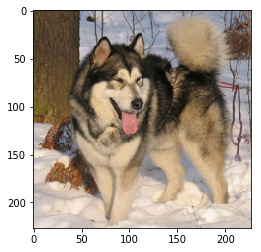

In [17]:
images, labels = next(iter(valid_loader))
print(images.shape)
images = images.numpy()
imshow(images[35])

**问题 3：**描述你所选的数据预处理流程。 
- 你是如何调整图像大小的（裁剪、拉伸等）？你选择的输入张量大小是多少，为何？
- 你是否决定增强数据集？如果是，如何增强（平移、翻转、旋转等）？如果否，理由是？


**答案**  
1. 利用torchvision.transforms 对图像大小进行了处理， 处理成227x227的图像 (参考AlexNet)
2. 是的，对训练/测试数据集进行了增强，训练集进行随机旋转，剪裁，翻转，验证/测试数据集仅调整大小和剪裁，增强数据集可以避免训练时的过拟合，使模型有更强的泛化能力

### （实现）模型架构

创建分类小狗品种的 CNN

In [18]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture - refer to AlexNet
# refer to https://www.cnblogs.com/wuliytTaotao/p/9544625.html
class Net(nn.Module):
    ### TODO6: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,  96,  11, stride=4, padding=0)
        self.conv2 = nn.Conv2d(96, 256,  5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(256,384,  3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(384,384,  3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(384,256,  3, stride=1, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(3, 2)

        # fully connected layers 
        self.fc1 = nn.Linear(256*6*6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 133)

        self.dropout = nn. Dropout(p=0.25)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))
        
        # flatten image as input  must match as above !!!
        x = x.view(-1, 256*6*6)
        
        # add fully connnected layers
        x = self.dropout(x)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

# check if CUDA is available
use_cuda = torch.cuda.is_available()

#-#-# NOT modify the code below this line. #-#-#
# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    print('model_scratch moved to cuda..')
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)
model_scratch moved to cuda..


__问题 4：__列出获得最终 CNN 结构的步骤以及每步的推理过程。  

__答案：__   
1.  最初尝试课程和练习里的简单结构，试验了3~5层卷积，2~3层全连接，kernel数量从比较小的数，到用2^n系列，从16到256，全连接隐藏层nodes用1000~2000，但训练效果很差，loss超大，或者下降很慢  
2. 通过在网络论坛里看帖和求教，决定参考AlexNet搭建网络 （图像输入大小比较合适），结构并不复杂
3. 刚开始建立AlexNet时，担心项目提供的GPU不够强大（之前训练简单模型速度也不快，每个周期80-90秒）， 先做了简化，少用一个卷积层，全连接隐藏层的nodes数量也打了折扣，但训练几轮效果均不理想， 最终还是参照AlexNet完整的网络结构（除了最后一层输出为133类），经过几轮实验，同简单模型相比，速度并没有明显降低  
4. 经过80个完整周期的训练，耗时2个多小时，测试准确率终于达到13%（满足项目要求）

### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/stable/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/stable/optim.html)。在下面将所选的损失函数另存为 `criterion_scratch`，并将优化器另存为 `optimizer_scratch`。

In [19]:
import torch.optim as optim

### TODO7: select loss function
criterion_scratch = nn.CrossEntropyLoss()
### TODO8: select optimizeross()

optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

### （实现）训练和验证模型

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_scratch.pt'`。

In [21]:
import time
from PIL import ImageFile # refer to https://blog.csdn.net/liulina603/article/details/81908340
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    print('Start training...')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    print()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        start = time.time() 
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
         
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            '''if batch_idx == 0:
                print('type(output)', type(output))
                print('output', output)'''
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            optimizer.step()
            
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            ## DONE
            
            if batch_idx % 20 == 0:    # print training loss every specified number of mini-batches
                print('Epoch %d, Batch %d loss: %.16f  Time elapsed: %.2f s' %
                      (epoch, batch_idx, train_loss,(time.time()-start)))

             
        ######################    
        # validate the model #
        ######################
        model.eval()  # dropout is off
        print('Model in validating ...')
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()

                ## TODO foward pass
                output = model(data)
                loss = criterion(output, target)
            
                ## update the average validation loss
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                ## DONE
                   
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))
        
        ## TODO9: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    valid_loss_min,  valid_loss))
            
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path )
    
    print('End training.')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    # return trained model
    return model

In [23]:
# define a dictionary of dada loaders
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
n_epochs = 80

# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Start training...
2019-05-23 13:11:11

Epoch 1, Batch 0 loss: 4.8373498916625977  Time elapsed: 1.07 s
Epoch 1, Batch 20 loss: 4.8688449859619141  Time elapsed: 16.77 s
Epoch 1, Batch 40 loss: 4.8725442886352539  Time elapsed: 32.85 s
Epoch 1, Batch 60 loss: 4.8736290931701660  Time elapsed: 48.51 s
Epoch 1, Batch 80 loss: 4.8701419830322266  Time elapsed: 64.13 s
Epoch 1, Batch 100 loss: 4.8677849769592285  Time elapsed: 81.10 s
Model in validating ...
Epoch: 1 	Training Loss: 4.867028 	Validation Loss: 4.844594
Validation loss decreased (inf --> 4.844594).  Saving model ...
Epoch 2, Batch 0 loss: 4.8573884963989258  Time elapsed: 0.81 s
Epoch 2, Batch 20 loss: 4.8095083236694336  Time elapsed: 17.99 s
Epoch 2, Batch 40 loss: 4.8150119781494141  Time elapsed: 32.18 s
Epoch 2, Batch 60 loss: 4.8137636184692383  Time elapsed: 47.74 s
Epoch 2, Batch 80 loss: 4.8082237243652344  Time elapsed: 63.84 s
Epoch 2, Batch 100 loss: 4.8038787841796875  Time elapsed: 81.83 s
Model in validating ..

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 10%。

In [25]:
def test(loaders, model, criterion, use_cuda):
    print("Start Testing... ")
    
    test_loss = 0.0
    class_correct = list(0. for i in range(n_class))
    class_total = list(0. for i in range(n_class))
    
    # Model in inference mode, dropout is off
    model.eval()  # dropout is off
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## foward pass
            output = model(data)
            loss = criterion(output, target)
            
            ## update the average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)    
            # compare predictions to true label
            correct_tensor = pred.eq(target.data.view_as(pred))
            correct = np.squeeze(correct_tensor.numpy()) if not use_cuda else np.squeeze(correct_tensor.cpu().numpy())
            
            # calculate test accuracy for each object class
            for i in range(len(target)):
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
                
    # print training/validation statistics 
    print('Test Loss: {:.6f}\n'.format(test_loss))
    
    for i in range(n_class):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
    
    print("End Testing")  

In [26]:
# run test
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Start Testing... 
Test Loss: 3.712977

Test Accuracy of 001.Affenpinscher: 25% ( 2/ 8)
Test Accuracy of 002.Afghan_hound:  0% ( 0/ 8)
Test Accuracy of 003.Airedale_terrier: 50% ( 3/ 6)
Test Accuracy of 004.Akita:  0% ( 0/ 8)
Test Accuracy of 005.Alaskan_malamute: 20% ( 2/10)
Test Accuracy of 006.American_eskimo_dog: 12% ( 1/ 8)
Test Accuracy of 007.American_foxhound: 14% ( 1/ 7)
Test Accuracy of 008.American_staffordshire_terrier: 12% ( 1/ 8)
Test Accuracy of 009.American_water_spaniel: 25% ( 1/ 4)
Test Accuracy of 010.Anatolian_shepherd_dog:  0% ( 0/ 6)
Test Accuracy of 011.Australian_cattle_dog: 22% ( 2/ 9)
Test Accuracy of 012.Australian_shepherd: 22% ( 2/ 9)
Test Accuracy of 013.Australian_terrier:  0% ( 0/ 6)
Test Accuracy of 014.Basenji: 11% ( 1/ 9)
Test Accuracy of 015.Basset_hound: 40% ( 4/10)
Test Accuracy of 016.Beagle: 62% ( 5/ 8)
Test Accuracy of 017.Bearded_collie: 12% ( 1/ 8)
Test Accuracy of 018.Beauceron: 57% ( 4/ 7)
Test Accuracy of 019.Bedlington_terrier:  0% ( 0/ 6)


---
<a id='step4'></a>
## 第 4 步：（使用迁移学习）创建分类小狗品种的 CNN

现在你将使用迁移学习创建能够识别图中小狗品种的 CNN。你的 CNN 必须在测试集上至少达到 60% 的准确率。

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dogImages/train`、`dogImages/valid` 和 `dogImages/test` 下）。 

**你也可以使用在从头开始创建 CNN 这一步时创建的同一数据加载器**。

In [9]:
## TODO: Specify data loaders
import numpy as np
import torch
import os

import torch.nn as nn
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO5: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_batch_size = 60  
test_batch_size = 50


train_dir = '/data/dog_images/train'
valid_dir = '/data/dog_images/valid'
test_dir  = '/data/dog_images/test'

# 数据增强 transforms
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224), 
                                       transforms.RandomHorizontalFlip(), 
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                       ])
test_transforms = transforms.Compose([transforms.Resize(255), 
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

# use ImageFloder to load datasets
train_data = datasets.ImageFolder(train_dir, transform = train_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform = test_transforms)
test_data  = datasets.ImageFolder(test_dir, transform = test_transforms)

# load data
train_loader = torch.utils.data.DataLoader(train_data, batch_size = train_batch_size,
                                           shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = test_batch_size)
test_loader  = torch.utils.data.DataLoader(test_data,  batch_size = test_batch_size)   

n_class = len(train_data.classes) # number of dog classes (狗狗品种)
classes = train_data.classes

print('Num training images: ', len(train_data))
print('Num valid images: ', len(valid_data))
print('Num test images: ', len(test_data))
print('Num classes: ', n_class)

print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

Num training images:  6680
Num valid images:  835
Num test images:  836
Num classes:  133
112
17
17


In [10]:
# helper function to un-normalize and display an image
def imshow(img):
    img = 0.5 * img + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

torch.Size([50, 3, 224, 224])


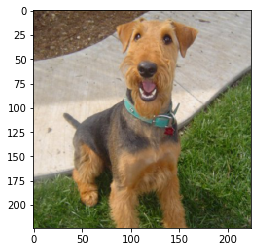

In [11]:
images, labels = next(iter(test_loader))
print(images.shape)
images = images.numpy()
imshow(images[20])

### （实现）模型架构

使用迁移学习创建分类小狗品种的 CNN。在以下代码单元格中填写代码并将初始化的模型另存为变量 `model_transfer`。

In [12]:
## TODO11: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
#print(model_transfer)

In [13]:
# only freeze features.parameters for pre-trained model 
for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features

# replace last layer in classifier
model_transfer.classifier[6] = nn.Linear(n_inputs, n_class)
print(model_transfer)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
    
if use_cuda:
    print('CUDA is available!  model_transfer moved to GPU...')
    model_transfer.cuda()
else:
    print('CUDA is NOT available.  model_transfer on CPU...')

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__问题 5：__列出获得最终 CNN 结构的步骤以及每步的推理过程。解释为何该结构适合解决手头的问题。

__答案：__   
1. 项目所使用的数据集不大（训练集仅6680张图片），而且图片大小与ImageNet数据集图片相当，非常适合用基于ImageNet训练出来的模型做迁移学习 
2. VGG16模型结构既不是太简单，也不是太复杂，较为适用我们的数据量级  
3. 因为数据量不大，图像数据也类似，获取VGG16模型后，仅替换分类器（全连接层）的最后一层，保留原输入数量，而使输出数量等于小狗数据集的类别数量，即获得了最终的CNN结构  
4. 仅需训练更新的分类器（全连接层），相比全新自建模型，不用很长训练时间，即可获得较为满意的预测结果（训练时间太长，反而可能过拟合）


### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/master/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/master/optim.html)。在下面将所选的损失函数另存为 `criterion_transfer`，并将优化器另存为 `optimizer_transfer`。

In [18]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
# only optimize classifier.parameters
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr = 0.001)

### （实现）训练和验证模型。

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_transfer.pt'`。

In [19]:
import time
from PIL import ImageFile 
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    print('Start training...')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    print()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        start = time.time() 
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
         
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            '''if batch_idx == 0:
                print('type(output)', type(output))
                print('output', output)'''
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            optimizer.step()
            
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            ## DONE
            
            if batch_idx % 20 == 0:    # print training loss every specified number of mini-batches
                print('Epoch %d, Batch %d loss: %.16f  Time elapsed: %.2f s' %
                      (epoch, batch_idx, train_loss,(time.time()-start)))

            '''if batch_idx == 0:
                #print('data.shape', data.shape)
                #print('data', data)
                #print('target.shape', target.shape)
                #print('target', target)
                print('loss.data', loss.data)
                print('loss.data.shape', loss.data.shape)
                print('loss.item()', loss.item())
                print('type(loss.item())', type(loss.item()))'''
             
        ######################    
        # validate the model #
        ######################
        model.eval()  # dropout is off
        print('Model in validating ...')
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()

                ## TODO foward pass
                output = model(data)
                loss = criterion(output, target)
            
                ## update the average validation loss
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                ## DONE
                   
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))
        
        ## TODO9: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                    valid_loss_min,  valid_loss))
            
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path )
    
    print('End training.')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    # return trained model
    return model

In [20]:
# define a dictionary of dada loaders
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [23]:
# train the model
n_epochs = 10 # actually about 20 epochs( cont. on previously trained)
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Start training...
2019-05-23 04:36:18

Epoch 1, Batch 0 loss: 1.5581896305084229  Time elapsed: 0.70 s
Epoch 1, Batch 20 loss: 1.4922991991043091  Time elapsed: 19.14 s
Epoch 1, Batch 40 loss: 1.5119360685348511  Time elapsed: 36.51 s
Epoch 1, Batch 60 loss: 1.4992899894714355  Time elapsed: 53.87 s
Epoch 1, Batch 80 loss: 1.5097812414169312  Time elapsed: 71.00 s
Epoch 1, Batch 100 loss: 1.5021340847015381  Time elapsed: 88.48 s
Model in validating ...
Epoch: 1 	Training Loss: 1.506372 	Validation Loss: 0.622316
Validation loss decreased (inf --> 0.622316).  Saving model ...
Epoch 2, Batch 0 loss: 1.6921765804290771  Time elapsed: 0.71 s
Epoch 2, Batch 20 loss: 1.4494419097900391  Time elapsed: 19.16 s
Epoch 2, Batch 40 loss: 1.4216620922088623  Time elapsed: 36.55 s
Epoch 2, Batch 60 loss: 1.4864988327026367  Time elapsed: 53.26 s
Epoch 2, Batch 80 loss: 1.4630323648452759  Time elapsed: 70.99 s
Epoch 2, Batch 100 loss: 1.4642591476440430  Time elapsed: 88.18 s
Model in validating ..

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 60%。

In [31]:
def test(loaders, model, criterion, use_cuda):
    print("Start Testing... ")
    
    test_loss = 0.0
    class_correct = list(0. for i in range(n_class))
    class_total = list(0. for i in range(n_class))
    
    # Model in inference mode, dropout is off
    model.eval()  # dropout is off
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## foward pass
            output = model(data)
            loss = criterion(output, target)
            
            ## update the average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)    
            # compare predictions to true label
            correct_tensor = pred.eq(target.data.view_as(pred))
            correct = np.squeeze(correct_tensor.numpy()) if not use_cuda else np.squeeze(correct_tensor.cpu().numpy())
            
            # calculate test accuracy for each object class
            for i in range(len(target)):
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
                
    # print training/validation statistics 
    print('Test Loss: {:.6f}\n'.format(test_loss))
    
    for i in range(n_class):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
    
    print("End Testing")  

In [32]:
# run test
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Start Testing... 
Test Loss: 0.581156

Test Accuracy of 001.Affenpinscher: 87% ( 7/ 8)
Test Accuracy of 002.Afghan_hound: 75% ( 6/ 8)
Test Accuracy of 003.Airedale_terrier: 100% ( 6/ 6)
Test Accuracy of 004.Akita: 75% ( 6/ 8)
Test Accuracy of 005.Alaskan_malamute: 100% (10/10)
Test Accuracy of 006.American_eskimo_dog: 87% ( 7/ 8)
Test Accuracy of 007.American_foxhound: 85% ( 6/ 7)
Test Accuracy of 008.American_staffordshire_terrier: 100% ( 8/ 8)
Test Accuracy of 009.American_water_spaniel: 50% ( 2/ 4)
Test Accuracy of 010.Anatolian_shepherd_dog: 100% ( 6/ 6)
Test Accuracy of 011.Australian_cattle_dog: 66% ( 6/ 9)
Test Accuracy of 012.Australian_shepherd: 77% ( 7/ 9)
Test Accuracy of 013.Australian_terrier: 66% ( 4/ 6)
Test Accuracy of 014.Basenji: 88% ( 8/ 9)
Test Accuracy of 015.Basset_hound: 90% ( 9/10)
Test Accuracy of 016.Beagle: 75% ( 6/ 8)
Test Accuracy of 017.Bearded_collie: 87% ( 7/ 8)
Test Accuracy of 018.Beauceron: 71% ( 5/ 7)
Test Accuracy of 019.Bedlington_terrier: 100% ( 6

### （实现）使用模型预测小狗品种

编写一个函数，它会将图像路径作为输入，并返回模型预测的小狗品种（`Affenpinscher`、`Afghan hound` 等）。

In [113]:
### TODO12: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
def predict_breed_transfer(img_path, model, class_names):

    ## Load and pre-process an image from the given img_path
    ## Return the *dog breed* of the predicted class for that image
    
    ## use process_image as defined in part 2
    img_tensor = process_image(img_path)
    
    if use_cuda:
        model.cuda()
        img_tensor = img_tensor.cuda()
    
    ## use pre-trained model to predict 
    model.eval()
    output = model(img_tensor)
    
    ps = torch.exp(output)
    _, index = ps.topk(1)
    index = index.cpu().detach().numpy().tolist()[0]  # predicted class index (0~132)
    print('Image file: ', img_path)
    print('Predicted class:', index)
    
    return class_names[index[0]] # return the predicted breed

In [114]:
## 测试以上预测函数品种的函数
# 1. 调用训练好的模型参数
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# check if CUDA is available
use_cuda = torch.cuda.is_available()
    
if use_cuda:
    print('CUDA is available!  model_transfer moved to GPU...')
    model_transfer.cuda()
else:
    print('CUDA is NOT available.  model_transfer on CPU...')

CUDA is available!  model_transfer moved to GPU...


In [115]:
# 2. 获得文件名
from glob import glob
# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

In [116]:
# 3. 获得小狗品种名称
# define a dictionary of dada loaders
data_transfer = {'train': train_data, 'valid': valid_data, 'test': test_data}

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

In [117]:
# 4. 测试函数效果 返回的小狗品种名称，即 图像所在文件夹的名称
img_path = dog_files[590]
predict_breed_transfer(img_path, model_transfer, class_names)

Image file:  /data/dog_images/train/116.Parson_russell_terrier/Parson_russell_terrier_07525.jpg
Predicted class: [115]


'Parson russell terrier'

---
<a id='step5'></a>
## 第 5 步：编写算法

编写一个算法，它会将图像的文件路径作为输入，并首先判断图像中是否包含人脸、小狗，或二者都不含。然后，
- 如果在图像中检测到了__小狗__，则返回预测的品种。
- 如果在图像中检测到了__人脸__，则返回相似的小狗品种。
- 如果二者都没检测到，则输出错误消息。

你可以自己编写从图像中检测人脸和小狗的函数，当然也可以使用上面开发的 `face_detector` 和 `human_detector` 函数。你必须使用在第 4 步创建的 CNN 预测小狗品种。  

下面提供了一些示例算法输出，但是你也可以自己设计用户体验。

![Sample Human Output](images/sample_human_output.png)


### （实现）编写算法

In [118]:
### TODO13: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, model, classes_names):
    ## handle cases for a human face, dog, and neither
    is_face = face_detector(img_path) # 人脸检测
    if is_face: 
        breed = predict_breed_transfer(img_path, model, classes_names)
        print('\nHello! You find a human: he/she looks lika a ', breed)
    elif dog_detector(img_path):  # 小狗检测  
        breed = predict_breed_transfer(img_path, model, classes_names)
        print('\nHello! You find a dog: its breed is ', breed)
    else:
        print("Error! No human No dog")
    
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.show()

Image file:  /data/dog_images/train/116.Parson_russell_terrier/Parson_russell_terrier_07525.jpg
Predicted class: [115]

Hello! You find a dog: its breed is  Parson russell terrier


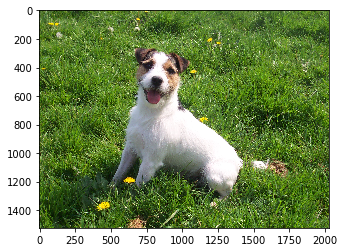

In [119]:
#img_path = human_files[100]
img_path = dog_files[590]

# run my algorithm to predict human or dog
run_app(img_path, model_transfer, class_names)

---
<a id='step6'></a>
## 第 6 步：测试算法

在此部分测试新算法啦。算法认为看起来像哪种小狗？如果你有一只狗，算法能准确预测出小狗的品种吗？如果你有一只猫，算法会错误地认为这只猫是小狗吗？

### （实现）在样本图像上测试算法。

至少在计算机上用 6 张图像测试你的算法。你可以使用任何图像。至少测试两张人脸图像和两张小狗图像。  

__问题 6：__结果基本满意， 人和狗区分得较好:) 小狗预测偶有偏差，但基本是相近的品种，比如有些Mastiff 预测结果是 Bullmastiff， 有的Doberman_pinscher预测结果是German pinscher 

__答案：__  
1. 迁移学习的模型，可尝试ResNet或DenseNet等， 相比VGG16更复杂，特征识别能力更强的  
2. 可训练更长时间，以达到更高准确率
3. 可用更多图片进行训练

Image file:  /data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg
Predicted class: [15]

Hello! You find a human: he/she looks lika a  Beagle


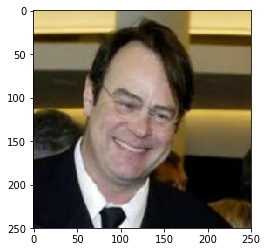

Image file:  /data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg
Predicted class: [55]

Hello! You find a human: he/she looks lika a  Dachshund


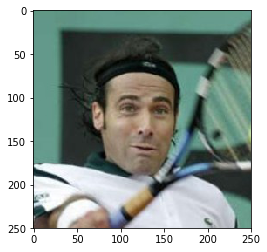

Image file:  /data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg
Predicted class: [87]

Hello! You find a human: he/she looks lika a  Irish water spaniel


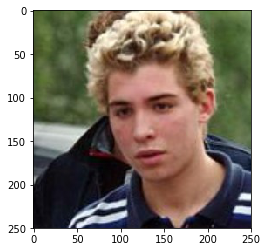

Image file:  /data/dog_images/train/115.Papillon/Papillon_07482.jpg
Predicted class: [114]

Hello! You find a dog: its breed is  Papillon


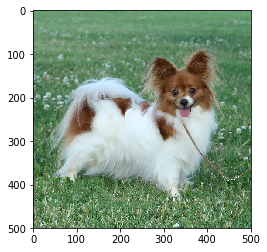

Image file:  /data/dog_images/train/115.Papillon/Papillon_07479.jpg
Predicted class: [114]

Hello! You find a dog: its breed is  Papillon


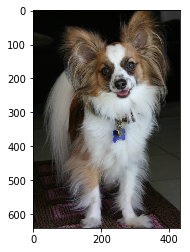

Image file:  /data/dog_images/train/115.Papillon/Papillon_07465.jpg
Predicted class: [114]

Hello! You find a dog: its breed is  Papillon


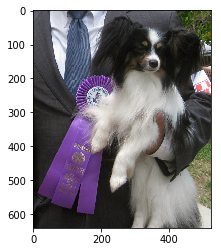

Image file:  /data/dog_images/train/115.Papillon/Papillon_07457.jpg
Predicted class: [114]

Hello! You find a dog: its breed is  Papillon


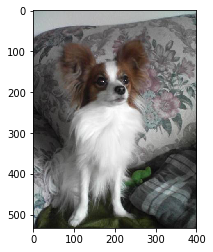

Image file:  /data/dog_images/train/115.Papillon/Papillon_07455.jpg
Predicted class: [114]

Hello! You find a dog: its breed is  Papillon


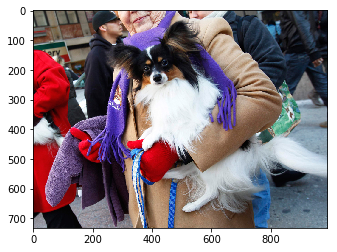

In [128]:
## TODO14: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[501:506])):
    run_app(file, model_transfer, class_names)
